In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

In [2]:
IMG_SIZE=256
Channel=3
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15
    )
train_generator= train_datagen.flow_from_directory(
    r"D:\AZH\Computer Vision\Hand detection\Dataset\train",
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 630 images belonging to 3 classes.


In [3]:
validation_datagen=ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=15
)
validation_generator= validation_datagen.flow_from_directory(
    r"D:\AZH\Computer Vision\Hand detection\Dataset\val",
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 90 images belonging to 3 classes.


In [4]:
IMG_SIZE=256
Channel=3
test_datagen=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15
    )
test_generator= test_datagen.flow_from_directory(
    r"D:\AZH\Computer Vision\Hand detection\Dataset\test",
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 180 images belonging to 3 classes.


In [16]:
class_indices=train_generator.class_indices
class_name=list(class_indices.keys())
class_name

['Go', 'Left', 'Right']

In [6]:
test_generator[0][0].shape

(32, 256, 256, 3)

In [7]:
Batch_size=32
input_shape=(IMG_SIZE,IMG_SIZE,Channel)
n_classes=3
model=models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(20,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [9]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [10]:

history=model.fit(
    train_generator,
    steps_per_epoch=19,  # train_generator's X / batch Size and this will let yoy know how many step you should use for an epoch
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=2,   # validatin_generator's Y / batch Size and this will let you know how many step you should use for an epoch
    verbose=1,
    epochs=20
)

Epoch 1/20
19/19 [==============================] - 48s 2s/step - loss: 0.7833 - accuracy: 0.5819 - val_loss: 0.7338 - val_accuracy: 0.5625
Epoch 2/20
19/19 [==============================] - 47s 2s/step - loss: 0.3451 - accuracy: 0.9030 - val_loss: 0.3649 - val_accuracy: 0.8594
Epoch 3/20
19/19 [==============================] - 48s 2s/step - loss: 0.1926 - accuracy: 0.9431 - val_loss: 0.3617 - val_accuracy: 0.8438
Epoch 4/20
19/19 [==============================] - 46s 2s/step - loss: 0.0980 - accuracy: 0.9699 - val_loss: 0.4345 - val_accuracy: 0.8594
Epoch 5/20
19/19 [==============================] - 51s 3s/step - loss: 0.0659 - accuracy: 0.9749 - val_loss: 0.5209 - val_accuracy: 0.8125
Epoch 6/20
19/19 [==============================] - 48s 2s/step - loss: 0.0321 - accuracy: 0.9916 - val_loss: 0.5557 - val_accuracy: 0.8281
Epoch 7/20
19/19 [==============================] - 46s 2s/step - loss: 0.0127 - accuracy: 0.9950 - val_loss: 0.8873 - val_accuracy: 0.7656
Epoch 8/20
19/19 [==

In [11]:
scores=model.evaluate(test_generator)

6/6 [==============================] - 6s 996ms/step - loss: 0.0245 - accuracy: 0.9944


In [12]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [13]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(image[i])
    img_array=tf.expand_dims(img_array,0)  #Create a batch by adding outer batch dimension axis
    predictions=model.predict(img_array)
    predicted_class=class_name[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 44ms/step


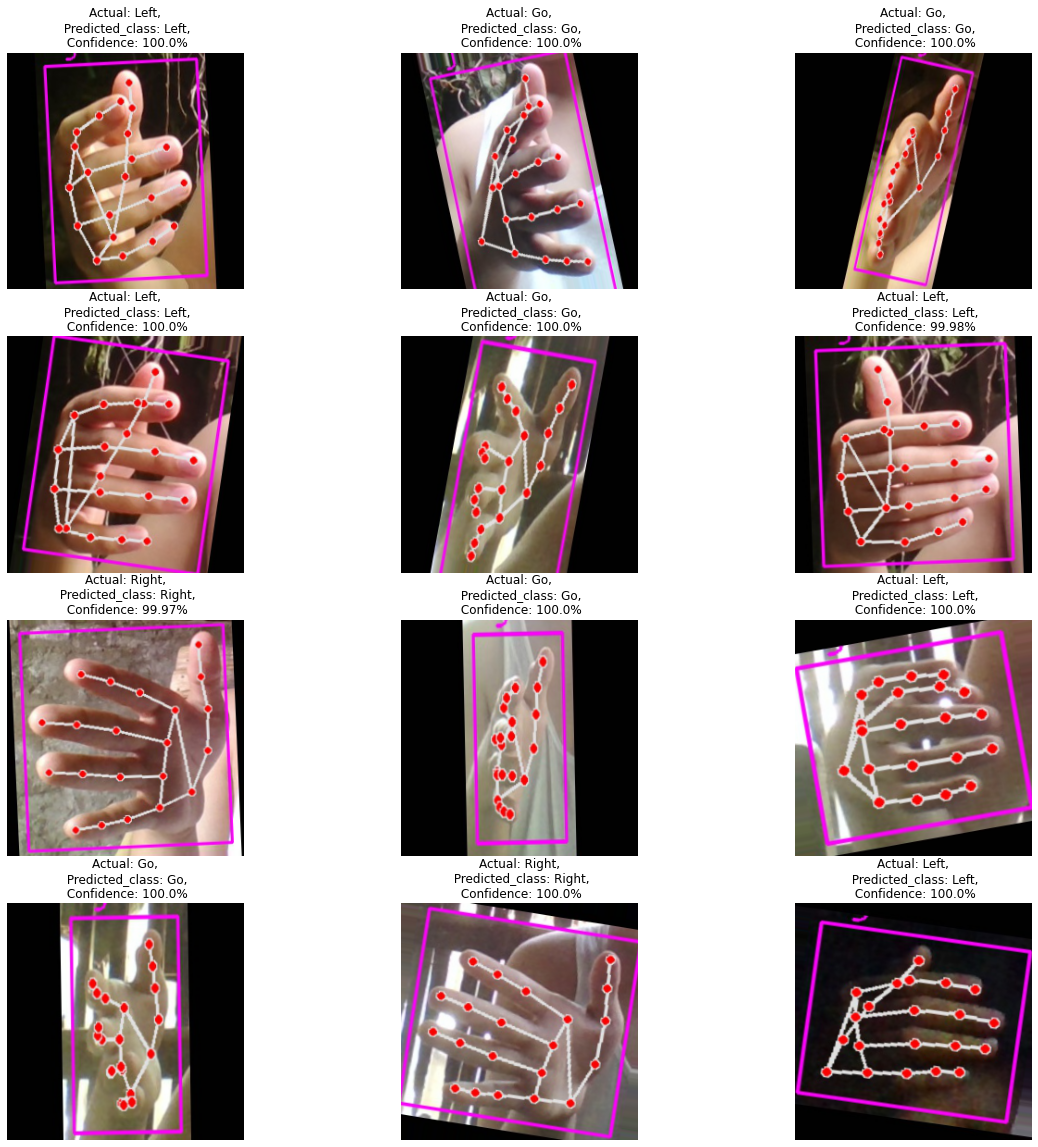

In [25]:
plt.figure(figsize=(20,20))
for image,label in test_generator:
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(image[i])
        predicted_class,confidence=predict(model,image[i])
        actual_class=class_name[int(label[i])]
        plt.title(f"Actual: {actual_class},\n Predicted_class: {predicted_class},\n Confidence: {confidence}%")
        plt.axis('off')
    break

In [26]:
score = model.evaluate(test_generator)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

6/6 [==============================] - 5s 808ms/step - loss: 0.0219 - accuracy: 0.9889
Test Loss: 0.021938741207122803
Test Accuracy: 0.9888888597488403


In [28]:
model.save(r"D:\AZH\Computer Vision\Hand detection\hand_model1.h5")